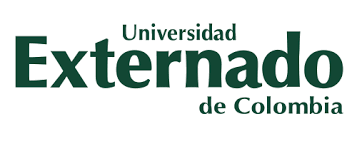

**JUAN SEBASTIAN PRIETO DUEÑAS**

**JOSE DAVID OBANDO ACOSTA**

**TALLER 1**

**FINANZAS COMPUTACIONALES**

In [5]:
import pandas as pd
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt
import seaborn as sbn
import warnings
import scipy.stats as stats
import pylab as py
warnings.filterwarnings("ignore")

In [6]:
!pip install yfinance
import yfinance as yf

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.5 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [7]:
#1. Descargue las series de tiempo de precios (ajustados) mensuales para el periodo Ene-2010 a Dic-2021 de las siguientes 4 acciones: MCD, GE, IBM, T. Con esta información:
activos = ["MCD", "GE","IBM","T"]
precios = yf.download(activos,start="2010-01-01",end="2021-12-31",interval = "1mo")
preciosadj = precios.loc[:,"Adj Close"]
preciosadj.head(20)

[*********************100%***********************]  4 of 4 completed


,GE,IBM,MCD,T
Date,,,,
2010-01-01,91.124489,76.034470,43.710957,7.295421
2010-01-06,NaN,NaN,NaN,NaN
2010-02-01,91.011131,78.997818,44.705173,7.279537
2010-02-08,NaN,NaN,NaN,NaN
2010-02-25,NaN,NaN,NaN,NaN
2010-03-01,103.782227,80.031357,47.111698,7.581749
2010-04-01,107.545761,80.499344,49.844334,7.646301
2010-04-07,NaN,NaN,NaN,NaN
2010-05-01,93.232918,78.165497,47.217609,7.283843


Acá realizamos la importaciones de los datos mensuales, pero hay que eliminar los NA.



In [8]:
preciosadj.dropna(inplace = True)
preciosadj

,GE,IBM,MCD,T
Date,,,,
2010-01-01,91.124489,76.034470,43.710957,7.295421
2010-02-01,91.011131,78.997818,44.705173,7.279537
2010-03-01,103.782227,80.031357,47.111698,7.581749
2010-04-01,107.545761,80.499344,49.844334,7.646301
2010-05-01,93.232918,78.165497,47.217609,7.283843
...,...,...,...,...
2021-08-01,105.016121,126.196465,232.276581,19.121511
2021-09-01,102.645004,126.366852,237.139893,18.835596
2021-10-01,104.559372,113.787476,241.506805,17.615223


Por ende, se eliminan los NA, para con ello no tener sesgos en la información, y que efectivamente tengamos los precios mensuales.

In [9]:
#a. Calcule los retornos logarítmicos.
retornos=np.log(preciosadj/preciosadj.shift()).dropna()
retornos

,GE,IBM,MCD,T
Date,,,,
2010-02-01,-0.001245,0.038233,0.022490,-0.002180
2010-03-01,0.131313,0.012998,0.052432,0.040677
2010-04-01,0.035622,0.005831,0.056383,0.008478
2010-05-01,-0.142816,-0.029421,-0.054138,-0.048563
2010-06-01,-0.125612,-0.009200,-0.006701,-0.004537
...,...,...,...,...
2021-08-01,0.017320,-0.004408,-0.021868,0.001370
2021-09-01,-0.022837,0.001349,0.020721,-0.015065
2021-10-01,0.018479,-0.104857,0.018247,-0.066985


Hallamos los retornos continuos, para con ello poder analizar las acciones.

In [10]:
#b. Calcule las estadísticas descriptivas (media, mediana, desv. estándar, curtosis, simetría) para cada uno de ellos. Presente los estadísticos en una tabla para todos los activos.
estadisticos=retornos.describe()
estadisticos
#la mediana es el quartil 2, o sea el 50% en la tabla

,GE,IBM,MCD,T
count,143.000000,143.000000,143.000000,143.000000
mean,0.000231,0.003689,0.012605,0.006158
std,0.086937,0.060536,0.042488,0.048299
min,-0.315013,-0.270005,-0.154431,-0.189159
25%,-0.041398,-0.024861,-0.009248,-0.019500
50%,-0.001930,0.002619,0.011742,0.006483
75%,0.042081,0.043382,0.040007,0.042621
max,0.316246,0.167670,0.130368,0.098672


Con este código encontramos los estadisticos descriptivos, para de esta forma analizarlos. No obstante, en el siguiente codigo tenemos la curtosis y el sesgo.

In [22]:
from scipy.stats import kurtosis
from scipy.stats import skew
descriptivos=pd.DataFrame({
   "Estadisticos":["Media","Mediana","SD","Curtosis","Simetría"],
   "GE":[retornos["GE"].mean(),retornos["GE"].median(),retornos["GE"].std(),retornos["GE"].kurtosis(),retornos["GE"].skew()],
   "IBM":[retornos["IBM"].mean(),retornos["IBM"].median(),retornos["IBM"].std(),retornos["IBM"].kurtosis(),retornos["IBM"].skew()],
   "MCD":[retornos["MCD"].mean(),retornos["MCD"].median(),retornos["MCD"].std(),retornos["MCD"].kurtosis(),retornos["MCD"].skew()],
   "T":[retornos["T"].mean(),retornos["T"].median(),retornos["T"].std(),retornos["T"].kurtosis(),retornos["T"].skew()]
})
descriptivos

,Estadisticos,GE,IBM,MCD,T
0,Media,0.000231,0.003689,0.012605,0.006158
1,Mediana,-0.001930,0.002619,0.011742,0.006484
2,SD,0.086937,0.060536,0.042488,0.048299
3,Curtosis,3.040759,2.653578,1.597000,1.549809
4,Simetría,-0.088296,-0.564631,-0.410195,-0.707909


Por lo consiguiente, se evidencia que se cumple el supuesto de los retornos continuos, donde el promedio debe ser 0, o muy cercano al mismo, ya que pueden haber retornos muy altos o muy bajos y se van cancelando.

Además, se debe tener presente que entre más cercana sea la mediana a la media, se puede deducir que puede tener una distribución normal.

Por otro lado, dado a la desviación estandar, se evidencia que el activo GE es el que tiene mayor variabilidad, y teniendo como supuesto que la variabilidad es igual a la volatilidad, el activo más volatil es GE y el menos volatil es MCD.

Asimismo, se evidencia que el activo GE es el unico que tiene una distribución leptocútica, ya que es mayor a 3, y los otros activos poseen una distribución mesocúrtica. Por otra parte, al investigar que nos da el comando Kurtosis, dice que entre más cercano a 0 el valor es un distribución normal, entonces, el activo más semejante a una distribución normal es T.

No obstante, al comparar la SD y la curtosis, se evidencia que el activo seguramente no tiene una distribución normal, ya que tiene la curtosis más alta y la SD más grande. 

Por el lado del sesgo, evidencia que todas las acciones tiene una cola derecha, es decir un sesgo a derecha.

In [64]:
#c. Presente en un Data Frame los retornos esperados y las volatilidades anualizadas
esperados = []
volatilidades = []
for i in range(0,143,13):
  volatilidades.append(retornos[i:i+12].std())
  esperados.append(retornos[i:i+12].mean())
print("Los retornos esperados anualizados son = ",esperados)
print("Las volatilidades esperados anualizados son = ",volatilidades)


Los retornos esperados anualizados son =  [GE     0.021076
IBM    0.024945
MCD    0.016470
T      0.013751
dtype: float64, GE    -0.004946
IBM    0.017646
MCD    0.025103
T      0.012628
dtype: float64, GE     0.014800
IBM    0.003254
MCD    0.004058
T      0.019038
dtype: float64, GE     0.018333
IBM   -0.000828
MCD    0.002096
T      0.001642
dtype: float64, GE     0.004409
IBM   -0.004803
MCD   -0.001806
T      0.003793
dtype: float64, GE     0.016865
IBM   -0.002655
MCD    0.021653
T      0.022273
dtype: float64, GE    -0.013658
IBM   -0.005780
MCD    0.025474
T     -0.003538
dtype: float64, GE    -0.050541
IBM    0.005427
MCD    0.003211
T     -0.007182
dtype: float64, GE    -0.015107
IBM    0.000727
MCD    0.022764
T      0.016820
dtype: float64, GE    -0.024280
IBM   -0.010992
MCD    0.008726
T     -0.022665
dtype: float64, GE     0.013092
IBM    0.003486
MCD    0.011728
T     -0.011262
dtype: float64]
Las volatilidades esperados anualizados son =  [GE     0.104426
IBM    0.0456

In [24]:
print(esperados[0]["GE"])
activos = ["MCD", "GE","IBM","T"]
GE = []
IBM = []
MCD = []
T = []
for i in range(11):
  for a in activos:
    if a == "GE": GE.append(esperados[i][a])
    elif a == "IBM": IBM.append(esperados[i][a])
    elif a == "MCD": MCD.append(esperados[i][a])
    else: T.append(esperados[i][a])

exvo=pd.DataFrame({
    "Esperados":["1","2","3","4","5","6","7","8","9","10","11"],
    "GE":GE,
    "IBM":IBM,
    "MCD":MCD,
    "T":T
})
exvo

0.02107554102633798


,Esperados,GE,IBM,MCD,T
0,1,0.021076,0.024945,0.016470,0.013751
1,2,-0.004946,0.017646,0.025103,0.012628
2,3,0.014800,0.003254,0.004058,0.019038
3,4,0.018333,-0.000828,0.002096,0.001642
4,5,0.004409,-0.004803,-0.001806,0.003793
5,6,0.016865,-0.002655,0.021653,0.022273
6,7,-0.013658,-0.005780,0.025474,-0.003538
7,8,-0.050541,0.005427,0.003211,-0.007182
8,9,-0.015107,0.000727,0.022764,0.016820
9,10,-0.024280,-0.010992,0.008726,-0.022665


Revisando los retornos esperados por cada año, se videncia que el activo con mayor retorno fue MCD en el año 2, es decir en el 2011, y el de menor retorno fue de GE en el año 2017, año 8.

In [25]:
print(volatilidades[0]["GE"])
activos = ["MCD", "GE","IBM","T"]
GE = []
IBM = []
MCD = []
T = []
for i in range(11):
  for a in activos:
    if a == "GE": GE.append(volatilidades[i][a])
    elif a == "IBM": IBM.append(volatilidades[i][a])
    elif a == "MCD": MCD.append(volatilidades[i][a])
    else: T.append(volatilidades[i][a])

exvo=pd.DataFrame({
    "volatilidades":["1","2","3","4","5","6","7","8","9","10","11"],
    "GE":GE,
    "IBM":IBM,
    "MCD":MCD,
    "T":T
})
exvo

0.10442647145720403


,volatilidades,GE,IBM,MCD,T
0,1,0.104426,0.045693,0.038166,0.044166
1,2,0.067600,0.033204,0.025504,0.039477
2,3,0.048589,0.045033,0.042994,0.042298
3,4,0.052198,0.046834,0.030456,0.043531
4,5,0.046909,0.055022,0.031784,0.037863
5,6,0.059722,0.067184,0.054793,0.037372
6,7,0.035383,0.044881,0.032490,0.051344
7,8,0.061331,0.038034,0.042523,0.065836
8,9,0.156273,0.117916,0.032888,0.058120
9,10,0.138391,0.073349,0.079130,0.064280


Por lo tanto, el activo más volatil es el GE en el año 9, 2018, ya que tiene un 15.6% de desviación estandar, y el menos volatil fue MCD en el año 2, 2011 con una desviación estandar de 2.6%.

In [26]:
espe,vol=retornos.mean(),retornos.std()
espe,vol
espe*12,vol*np.sqrt(12)

(GE     0.002777
 IBM    0.044271
 MCD    0.151265
 T      0.073894
 dtype: float64, GE     0.301157
 IBM    0.209703
 MCD    0.147183
 T      0.167311
 dtype: float64)

In [27]:
voex=pd.DataFrame({
    "Punto_3":["Esperados","Volatilidad"],
    "GE":[0.002777,0.301157],
    "IBM":[0.044271,0.209703],
    "MCD":[ 0.151265, 0.147183],
    "T":[0.073894, 0.167311]
})
voex

,Punto_3,GE,IBM,MCD,T
0,Esperados,0.002777,0.044271,0.151265,0.073894
1,Volatilidad,0.301157,0.209703,0.147183,0.167311


Acá lo usamos como si todo fuera constante, entonces el retorno más alto due el de MCD, que coincide con lo anterior, y el menor es GE que también coincide con el anterior.

Sobre la volatilidad, la acción más volatil es GE y el menos volatilidad MCD, que tiene los mismo resultados anteriores.

In [28]:
import scipy.stats as stats
import pylab as py

In [29]:
#d. Calcule la matriz de correlaciones de Pearson y de Sperman
retornos.corr(method="pearson")

,GE,IBM,MCD,T
GE,1.000000,0.363578,0.151318,0.346994
IBM,0.363578,1.000000,0.322564,0.412458
MCD,0.151318,0.322564,1.000000,0.338351
T,0.346994,0.412458,0.338351,1.000000


Se evidencia que las acciones con mayor correlación positiva o directa son los activos T y IBM, mas, no es que sea muy fuerte su correlación. Por otro lado, no hay correlación inversa o negativa, entonces la menor correlación directa es entre los activos es MCD y GE.

In [30]:
retornos.corr(method="spearman")

,GE,IBM,MCD,T
GE,1.000000,0.343396,0.091615,0.312855
IBM,0.343396,1.000000,0.260223,0.358745
MCD,0.091615,0.260223,1.000000,0.299497
T,0.312855,0.358745,0.299497,1.000000


Con este nuevo test, se repite la correlación más alta con IBM y T, y la más baja correlación directa es es GE y MCD, coiciden tambien. Entonces, se tiene esa correlación de 41.2% y 35.8%, ya que ambas acciones son de tecnología. 

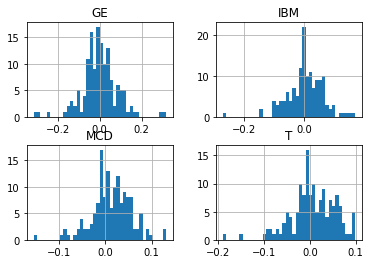

In [ ]:
#e. Grafique el histograma de frecuencia de los retornos para dos de las cuatro acciones.
retornos.hist(bins=40);

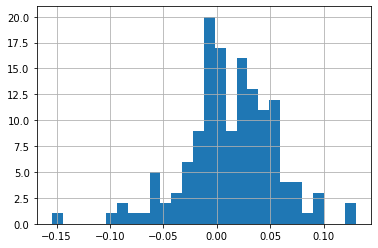

In [ ]:
retornos["MCD"].hist(bins=28);



*   Por lo general la accion presenta retornos negativos al estar claramente sesgada a la izquierda
*   Siendo su punto mas bajo un -20 en retornos



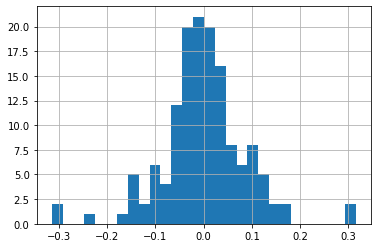

In [ ]:
retornos["GE"].hist(bins=28);



*   Con la accion GE esta sesgada a la izquiera tambien 
*   Datos atipicos de -0.3 y de 0.3



In [ ]:
#f. Implemente las pruebas de normalidad de Kolmogorov-Smirnov para todos los activos. Consolide los resultados en un Data Frame para todos.
sk=stats.kstest(retornos["MCD"],'norm'),stats.kstest(retornos["GE"],'norm'),stats.kstest(retornos["T"],'norm'),stats.kstest(retornos["IBM"],'norm')
sk

(KstestResult(statistic=0.4543298011470312, pvalue=1.736401601811309e-27),
 KstestResult(statistic=0.4159825521431614, pvalue=6.374904585192104e-23),
 KstestResult(statistic=0.46069960325149917, pvalue=2.713331985090179e-28),
 KstestResult(statistic=0.43726569561758094, pvalue=2.1441549482767187e-25))

In [ ]:
sk=pd.DataFrame({
    "Prueba de normalidad":["Kolmogorov-Smirnov"],
    "MCD":[stats.kstest(retornos["MCD"],'norm')],
    "GE":[stats.kstest(retornos["GE"],'norm')],
    "T":[stats.kstest(retornos["T"],'norm')],
    "IBM":[stats.kstest(retornos["IBM"],'norm')]
})
sk

,Prueba de normalidad,MCD,GE,T,IBM
0,Kolmogorov-Smirnov,"(0.4543298011470312, 1.736401601811309e-27)","(0.4159825521431614, 6.374904585192104e-23)","(0.46069960325149917, 2.713331985090179e-28)","(0.43726569561758094, 2.1441549482767187e-25)"


Dado a este test, se evidencia que ningún activo tiene una distribución normla, ya que el valor-p es menor a la significancia de 5%, por ende se rechaza la hipótesis nula, la cual era es una distribución normal. 

Debido a que el P-valor es menor a la significa de 5%, los 4 activos no son normales 

2. a. Calcule la volatilidad mensual y anualizada de las series de retornos usando las medidas
de:

i) desviación estándar

In [31]:
#LLamamos la desviacion estandar la cual ya sacamos en el primer punto 
estadisticos.iloc[2]

GE     0.086937
IBM    0.060536
MCD    0.042488
T      0.048299
Name: std, dtype: float64

Denotamos que la accion de GE es la que presenta mayor desvacion en sus retornos seguida por IBM
Sin embargo tanto T como MCD presentan fluctuaciones menos severas que las anteriormente mencionadas y sus valores son muy similares

ii) Parkinson

In [118]:
#se le restan los retornos al trabajar con mensuales 
lnHL = np.log(precios["High"]/precios["Low"]).dropna()
sigmaPark_d = (((1/(4*np.log(2)))*lnHL**2)-(retornos.mean()**2)).mean()**0.5
sigmaPark_d

GE     0.093021
IBM    0.062220
MCD    0.049406
T      0.054067
dtype: float64

In [110]:
# Volatilidad anulizada de Parkinson , con el numero 12 ya que los valores estan en meses
sigmaPark=sigmaPark_d*np.sqrt(12)
sigmaPark

GE     0.322234
IBM    0.215535
MCD    0.171148
T      0.187294
dtype: float64

iii) Garman-Klass

In [111]:
#la serie de volatilidad es mas suave , aunque tanto como en el ejemplo de clase dio un volatilidad ligeramnete mayor
lnHL = np.log(precios["High"]/precios["Low"]).dropna()
lnCO = np.log(precios["Close"]/precios["Open"]).dropna()
sigmaGK_d = ((0.5*lnHL**2-(2*np.log(2)-1)*lnCO**2)-(retornos.mean()**2)).mean()**0.5
sigmaGK_d

GE     0.094820
IBM    0.063019
MCD    0.052101
T      0.055676
dtype: float64

In [112]:
# Volatilidad anulizada de Garman-Klass
sigmaGK=sigmaGK_d*np.sqrt(12)
sigmaGK

GE     0.328467
IBM    0.218304
MCD    0.180484
T      0.192866
dtype: float64

iv) volatilidad ponderada
exponencial (EWMA) con una lambda de 0.94.

In [132]:
# Definir la función
#toman el dato mas reciente y lo ponderan con el 6% que va decreciendo
#Modelo tipo garch
def EWMAvol(retornos,Lambda):
  m = len(retornos) 
  b = np.arange(m-1,-1,-1) # secuencia decreciente
  l = np.repeat(0.94,m)

  varewma = ((np.power(retornos,2)*(np.power(l,b))).sum())*(1-Lambda)
  EWMAvol = np.sqrt(varewma)
  return(EWMAvol)

In [17]:
m = len(retornos) 
#Son 143 los retornos
m

143

In [18]:
#Se calcula la EWMA de cada accion
Lambda = 0.94
sigmaewma1 = EWMAvol(retornos["GE"],Lambda)*np.sqrt(12)
sigmaewma1

0.36506059074271197

In [19]:
Lambda = 0.94
sigmaewma2 = EWMAvol(retornos["IBM"],Lambda)*np.sqrt(12)
sigmaewma2

0.2563708005205651

In [20]:
Lambda = 0.94
sigmaewma3 = EWMAvol(retornos["MCD"],Lambda)*np.sqrt(12)
sigmaewma3

0.18180679939162225

In [21]:
Lambda = 0.94
sigmaewma4 = EWMAvol(retornos["T"],Lambda)*np.sqrt(12)
sigmaewma4

0.18827763856123053

In [113]:
ewmadf=pd.DataFrame({
    "Prueba de volatilidad":["EWMA","Desviacion","Parkinson","Garman-Klass"],
    "GE":[sigmaewma1,estadisticos.iloc[2,0],sigmaPark["GE"],sigmaGK["GE"]],
    "IBM":[sigmaewma2,estadisticos.iloc[2,1],sigmaPark["IBM"],sigmaGK["IBM"]],
    "MCD":[sigmaewma3,estadisticos.iloc[2,2],sigmaPark["MCD"],sigmaGK["MCD"]],
    "T":[sigmaewma4,estadisticos.iloc[2,3],sigmaPark["T"],sigmaGK["T"]],
})
ewmadf

,Prueba de volatilidad,GE,IBM,MCD,T
0,EWMA,0.365061,0.256371,0.181807,0.188278
1,Desviacion,0.086937,0.060536,0.042488,0.048299
2,Parkinson,0.322234,0.215535,0.171148,0.187294
3,Garman-Klass,0.328467,0.218304,0.180484,0.192866


La accion GE cuenta con una de las mayores volatilidades , es interesante recalcar como la accion T en sus 3 pruebas presenta unos datos muy similares y la accion MCD es una con menor volatilidad

b. Para un solo activo de su elección, presente las gráficas para las últimas tres medidas
de volatilidad.

In [ ]:
#se escogio la accion GE

***Medida de Parkinson***

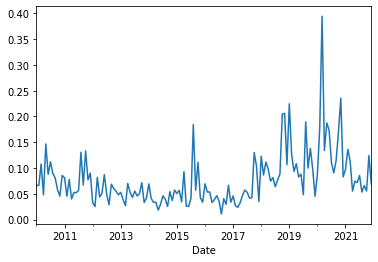

In [136]:
sigmaPark_dp = (((1/(4*np.log(2)))*lnHL**2)-(retornos.mean()**2))**0.5
sigmaPark_dp["GE"].plot()

***Medida de Garman-Klass***

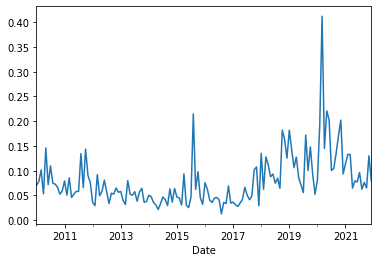

In [122]:
sigmaGK_dp = ((0.5*lnHL**2-(2*np.log(2)-1)*lnCO**2)-(retornos.mean()**2))**0.5
sigmaGK_dp["GE"].plot()



*   La accion de GE mostro un mayor volatilidad en el año 2015 y en los años 2019 y 2021 esto utlimo gracias al impacto de la pandemia de covid 
*   En terminos generales oscila entre 0.5 y 0.20 lo cual es mas alto que las demas analizadas en este taller



***Medida EWMA***

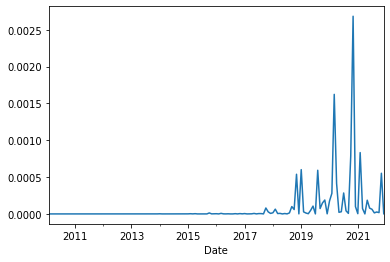

In [135]:

m = len(retornos) 
b = np.arange(m-1,-1,-1) # secuencia decreciente
l = np.repeat(0.94,m)

varewma = ((np.power(retornos["GE"],2)*(np.power(l,b))))*(1-Lambda)
varewma.plot()
